In [20]:
#Import nessesarry libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
# Load dataset
df = pd.read_csv('data_carVN_cleaned.csv')
df.head(3)

,car_name,year,price,assemble_place,series,driven kms,num_of_seat,engine_type,transmission
0,LandRover Range Rover HSE 3.0,2015,106488.0,Imported,SUV,65000,5,Petrol,Automatic
1,Mitsubishi Outlander 2.0 CVT Premium,2018,26267.0,Locally assembled,SUV,50000,7,Petrol,Automatic
2,Mazda 3 1.5L Luxury,2019,19326.0,Locally assembled,Sedan,51000,5,Petrol,Automatic


## Exploratory Data Analysis (EDA)

### **1.** Show the top 10 most expensive cars

In [24]:
top_10 = df.nlargest(10, 'price')
top_10

,car_name,year,price,assemble_place,series,driven kms,num_of_seat,engine_type,transmission
16817,Rolls Royce Ghost Series II EWB,2021,1522382.0,Imported,Sedan,6200,4,Petrol,Automatic
8909,Rolls Royce Ghost Series II EWB,2021,1451390.0,Imported,Sedan,5500,4,Petrol,Automatic
16041,Rolls Royce Cullinan 6.75 V12,2018,1451390.0,Imported,SUV,4000,4,Petrol,Automatic
19648,Rolls Royce Ghost Series II EWB,2021,1451390.0,Imported,Sedan,7000,4,Petrol,Automatic
16983,Rolls Royce Cullinan 6.75 V12,2019,1312877.0,Imported,SUV,20000,4,Petrol,Automatic
20803,Bentley Mulsanne 6.8 V8,2020,1163479.0,Imported,Sedan,7000,4,Petrol,Automatic
15100,Rolls Royce Cullinan Black Badge 6.75 V12,2022,1005719.0,Imported,SUV,300,4,Petrol,Automatic
6469,Rolls Royce Cullinan Black Badge 6.75 V12,2021,887399.0,Imported,SUV,1500,4,Petrol,Automatic
18657,Rolls Royce Phantom EWB,2012,784855.0,Imported,Sedan,14000,4,Petrol,Automatic
20999,Bentley Flying Spur First Edition V8,2021,780911.0,Imported,Sedan,200,5,Petrol,Automatic


### **2.** Comparison of the mean price between Imported cars and Locally assembled cars

In [71]:
df2 = df.groupby('assemble_place')['price'].mean().reset_index()
df2

,assemble_place,price
0,Imported,62096.394894
1,Locally assembled,26028.779774


Thus, we can conclude that imported cars have a higher average price than locally assembled cars.

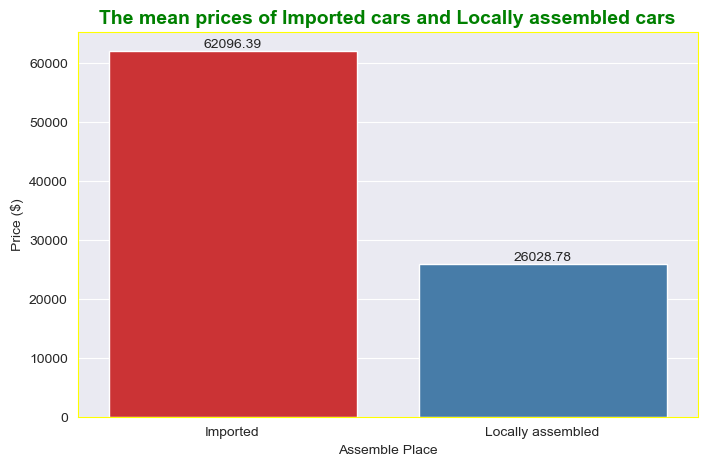

In [93]:
#Data visualization
custom = {"axes.edgecolor": "yellow", "grid.linestyle": "-", "grid.color": "white"}
sns.set_style("darkgrid", rc = custom)
PALETTE = sns.color_palette("Set1", 2) 
plt.rcParams["figure.figsize"] = (8,5) 
#Plot
ax = sns.barplot(data = df2, x = 'assemble_place',y= 'price',hue = 'assemble_place',palette = PALETTE);
ax.set_xlabel("Assemble Place")
ax.set_ylabel("Price ($)")
ax.set_title("The mean prices of Imported cars and Locally assembled cars",fontsize=14,fontweight="bold",color="green")
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', fontsize=10, label_type='edge')



### **3.** Average car price by year

In [133]:
df3 = df.groupby('year')['price'].mean().reset_index()
df3.head(3)

,year,price
0,1990,6207.960000
1,1991,6698.166667
2,1992,5071.416667


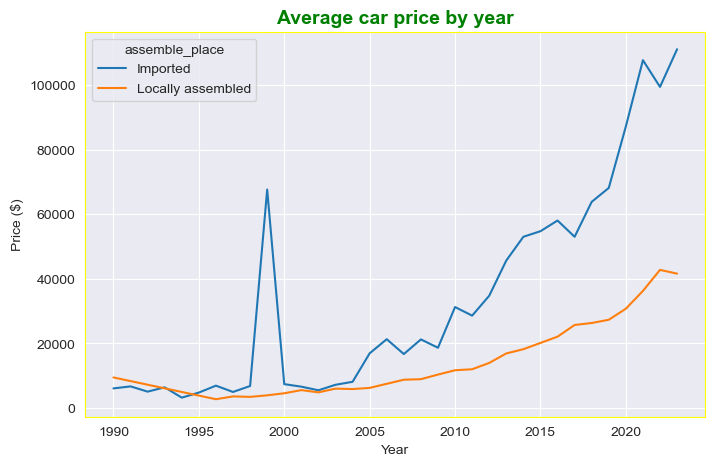

In [130]:
#Data Visualization
ax = sns.lineplot(data =df,x ='year',y='price',estimator = np.mean,hue ='assemble_place', errorbar=None );
ax.set_xlabel("Year")
ax.set_ylabel("Price ($)")
ax.set_title("Average car price by year",fontsize=14,fontweight="bold",color="green");

The line plot depicts the average car prices over the years, comparing imported cars with locally assembled car
- It is evident that the prices of imported cars have consistently been higher than those of locally assembled cars.
- There is a significant spike in the price of imported cars around the year 2000, while locally assembled cars show a more gradual and steady increase in price over time.
- The overall trend indicates that both imported and locally assembled car prices have risen.

### **4.** Correlation Matrix

In [137]:
#Label encode column ['assemble_place','transmission']
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['assemble_place'] = le.fit_transform(df['assemble_place'])
df['transmission'] = le.fit_transform(df['transmission'])

In [139]:
df.head()

,car_name,year,price,assemble_place,series,driven kms,num_of_seat,engine_type,transmission
0,LandRover Range Rover HSE 3.0,2015,106488.0,0,SUV,65000,5,Petrol,0
1,Mitsubishi Outlander 2.0 CVT Premium,2018,26267.0,1,SUV,50000,7,Petrol,0
2,Mazda 3 1.5L Luxury,2019,19326.0,1,Sedan,51000,5,Petrol,0
3,Mazda 2 1.5 AT,2015,14396.0,1,Sedan,38000,5,Petrol,0
4,Suzuki Swift GLX 1.2 AT,2021,22284.0,0,Hatchback,6000,5,Petrol,0


In [141]:
# Drop unnecessarry columns to create a correlation matrix
drop_field = ['car_name','series','engine_type']
df = df.drop(drop_field,axis = 1 )

In [149]:
# Correlation Matrix
corr = df.corr()
corr

,year,price,assemble_place,driven kms,num_of_seat,transmission
year,1.000000,0.218698,0.101762,0.002423,-0.057206,-0.323759
price,0.218698,1.000000,-0.274075,-0.012441,-0.029367,-0.191218
assemble_place,0.101762,-0.274075,1.000000,0.002631,0.034399,0.131164
driven kms,0.002423,-0.012441,0.002631,1.000000,0.013372,0.000115
num_of_seat,-0.057206,-0.029367,0.034399,0.013372,1.000000,0.169338
transmission,-0.323759,-0.191218,0.131164,0.000115,0.169338,1.000000


In [155]:
corr_new=corr.iloc[1:,:-1]
# Making mask for heatmap
mask =np.triu(np.ones_like(corr,dtype=bool))
mask = mask[1:,:-1]
mask

array([[False,  True,  True,  True,  True],
       [False, False,  True,  True,  True],
       [False, False, False,  True,  True],
       [False, False, False, False,  True],
       [False, False, False, False, False]])

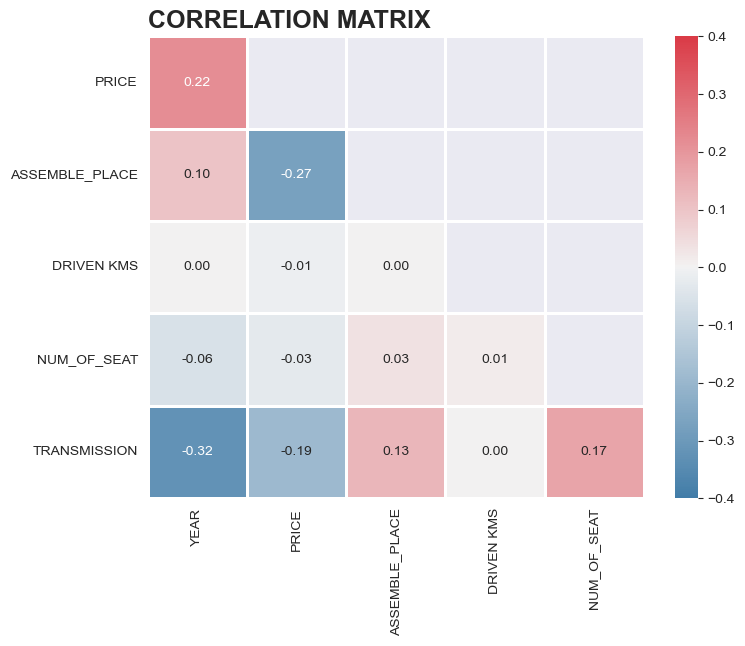

In [185]:
#Plot
custom = {"axes.edgecolor": "yellow", "grid.linestyle": "", "grid.color": "yellow"}
sns.set_style("darkgrid", rc = custom)
plt.rcParams["figure.figsize"] = (8,6)
cmap =sns.diverging_palette(240, 10, as_cmap=True)                      

ax = sns.heatmap(data=corr_new,mask=mask,annot=True,
                     cmap=cmap,vmin=-0.4,vmax=0.4,
                        linecolor="white",lw=0.75,fmt=".2f",);
yticks=[i.upper() for i in corr_new.index]
xticks=[i.upper() for i in corr_new.columns]
ax.set_yticklabels(yticks,rotation = 0);
ax.set_xticklabels(xticks,rotation = 90);
title = "CORRELATION MATRIX"
ax.set_title(title,loc="left",fontweight="bold",fontsize=18);

The correlation matrix heatmap shows the relationships between various variables in the dataset. Here are some key observations:
- Price has a moderate positive correlation with Year (0.22) and a slight negative correlation with Transmission (-0.19).
- Assemble Place is negatively correlated with Year (-0.27) and slightly positively correlated with Price (0.10).
- Transmission has a moderate negative correlation with Year (-0.32) and a slight positive correlation with Number of Seats (0.17).
- Driven Kilometers shows almost no correlation with any other variables.
- Number of Seats has minimal correlations with other variables, indicating it doesn't vary significantly with the other features.
- **Overall, the heatmap indicates that while some variables have moderate correlations, many of the relationships are weak or negligible.**